In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/'

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  50000 non-null  object
 1   score     50000 non-null  int64 
 2   at        50000 non-null  object
 3   content   50000 non-null  object
 4   sentimen  50000 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.9+ MB


In [ ]:
df.rename(columns = {'content':'review', 'sentimen':'label'}, inplace = True)

In [ ]:
df.head()

,userName,score,at,review,label
0,Elisya Kasni,5,2024-02-15 11:24:56,Bagus,POSITIVE
1,Rusman Man,2,2024-02-15 11:24:03,Dana mmg keren mantap.,POSITIVE
2,Qiliw Sadega,1,2024-02-15 11:23:34,Saya ngajuin upgrade dana premium krna ktp say...,NEGATIVE
3,Kijutjrv2 Kijut,3,2024-02-15 11:22:46,Kocak mana diskon nya ml malah eror segala kag...,NEGATIVE
4,Fifi Alfiyah,1,2024-02-15 11:21:34,Saldo hilang karena no lama Hilang ganti no sa...,NEGATIVE


In [ ]:
df.tail()

,userName,score,at,review,label
49995,Marha Marha,5,2023-12-31 16:34:55,Bagus,POSITIVE
49996,Unique Laudy,1,2023-12-31 16:33:47,"error, tidak bisa masuk",NEGATIVE
49997,supendi supendi,5,2023-12-31 16:30:08,Cukup membantu,POSITIVE
49998,hasansend farm,1,2023-12-31 16:28:51,"tolong pihak dana knp saldo saya hilang,ada yg...",NEUTRAL
49999,Maria Awoitau,1,2023-12-31 16:28:46,good. 👌,NEGATIVE


In [ ]:
#import library for LSTM
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Flatten, Dropout

In [ ]:
df["label"].unique()

array(['POSITIVE', 'NEGATIVE', 'NEUTRAL'], dtype=object)

In [ ]:
# Preprocessing data
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [ ]:
df['label'].value_counts()

2    26555
0    17073
1     6372
Name: label, dtype: int64

2 = Positive, 0 = Negative, 1 = Neutral

In [ ]:
df.head()

,userName,score,at,review,label
0,Elisya Kasni,5,2024-02-15 11:24:56,Bagus,2
1,Rusman Man,2,2024-02-15 11:24:03,Dana mmg keren mantap.,2
2,Qiliw Sadega,1,2024-02-15 11:23:34,Saya ngajuin upgrade dana premium krna ktp say...,0
3,Kijutjrv2 Kijut,3,2024-02-15 11:22:46,Kocak mana diskon nya ml malah eror segala kag...,0
4,Fifi Alfiyah,1,2024-02-15 11:21:34,Saldo hilang karena no lama Hilang ganti no sa...,0


In [ ]:
train_data, test_data = train_test_split(df, test_size = 0.2, random_state = 0)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 20330 to 2732
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  40000 non-null  object
 1   score     40000 non-null  int64 
 2   at        40000 non-null  object
 3   review    40000 non-null  object
 4   label     40000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.8+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 11841 to 2217
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  10000 non-null  object
 1   score     10000 non-null  int64 
 2   at        10000 non-null  object
 3   review    10000 non-null  object
 4   label     10000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 468.8+ KB


In [ ]:
# Tokenisasi teks
max_words = 10000  # Jumlah kata unik yang akan diambil
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(train_data['review'])

In [ ]:
# Sequencing dan padding
max_len = 100  # Panjang maksimal sequence
train_sequences = tokenizer.texts_to_sequences(train_data['review'])
train_padded = pad_sequences(train_sequences, maxlen=max_len, padding='post', truncating='post')
test_sequences = tokenizer.texts_to_sequences(test_data['review'])
test_padded = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

In [ ]:
# Membangun model LSTM
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(Flatten())  # Menambahkan Flatten layer untuk meratakan output LSTM menjadi 2D
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy') > 0.85 and logs.get('val_accuracy') > 0.85):
          print("\nReached 85% accuracy so cancelling training!")
          self.model.stop_training = True

callbacks = MyCallback()

In [ ]:
# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Training model
model.fit(train_padded, train_data['label'], epochs = 100, callbacks = ([callbacks]), validation_data=(test_padded, test_data['label']))

Epoch 1/100
1250/1250 [==============================] - 184s 132ms/step - loss: 0.5029 - accuracy: 0.7918 - val_loss: 0.4020 - val_accuracy: 0.8428
Epoch 2/100
1250/1250 [==============================] - ETA: 0s - loss: 0.3704 - accuracy: 0.8536
Reached 85% accuracy so cancelling training!
1250/1250 [==============================] - 142s 114ms/step - loss: 0.3704 - accuracy: 0.8536 - val_loss: 0.3764 - val_accuracy: 0.8519


In [ ]:
# Evaluasi model pada data test
loss, accuracy = model.evaluate(test_padded, test_data['label'])
print(f'Loss: {loss}, Accuracy: {accuracy}')

313/313 [==============================] - 10s 31ms/step - loss: 0.3764 - accuracy: 0.8519
Loss: 0.3764191269874573, Accuracy: 0.8518999814987183


313/313 [==============================] - 13s 41ms/step


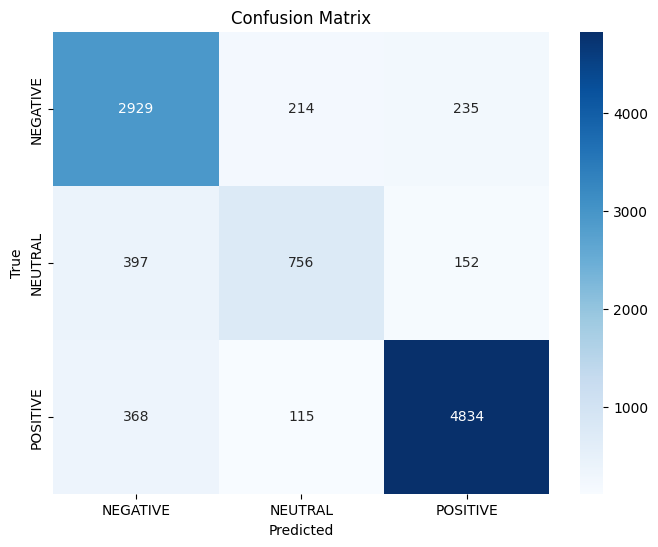

Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.79      0.87      0.83      3378
     NEUTRAL       0.70      0.58      0.63      1305
    POSITIVE       0.93      0.91      0.92      5317

    accuracy                           0.85     10000
   macro avg       0.81      0.79      0.79     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prediksi label pada data test
predictions = np.argmax(model.predict(test_padded), axis=-1)

# Menampilkan confusion matrix
cm = confusion_matrix(test_data['label'], predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Menampilkan classification report
class_report = classification_report(test_data['label'], predictions, target_names=le.classes_)
print("Classification Report:\n", class_report)

In [ ]:
# #(MENGECEK EVALUASI DENGAN DATA BARU / DATA TESTING)
# # Menggantikan test_padded dan test_data['label'] dengan data baru

# new_data_padded = preprocess_and_tokenize(new_data['content'])  # Sesuaikan dengan proses tokenisasi yang digunakan
# new_labels = new_data['label']

# # Evaluasi model pada data baru
# loss, accuracy = model.evaluate(new_data_padded, new_labels)
# print(f'Loss: {loss}, Accuracy: {accuracy}')


In [ ]:
# Teks baru yang akan diprediksi
new_text = "ntah barang apa pun ini"

# Tokenisasi teks baru
new_text_sequence = tokenizer.texts_to_sequences([new_text])
new_text_padded = pad_sequences(new_text_sequence, maxlen=max_len, padding='post', truncating='post')

# Prediksi
predicted_label = model.predict(new_text_padded)

# Mengembalikan label yang telah diencode ke nilai aslinya
decoded_label = le.inverse_transform(predicted_label.argmax(axis=1))

print(f"Predicted Label: {decoded_label[0]}")

1/1 [==============================] - 0s 34ms/step
Predicted Label: NEGATIVE


In [ ]:
# Simpan model ke Google Drive
model.save('/content/drive/MyDrive/LSTM/my_model')

In [ ]:
# # # Simpan model ke Google Drive
# model.save('/content/drive/MyDrive/LSTM/my_model_h5/model.h5')

In [ ]:
# import os
# from tensorflow.keras.models import save_model

# # Define the directory path
# directory_path = "/content/drive/MyDrive/LSTM/my_model_keras/"

# # Create the directory if it doesn't exist
# os.makedirs(directory_path, exist_ok=True)

# # Save the model to the specified path
# save_model(model, os.path.join(directory_path, "model.keras"))

In [ ]:
# LOAD MODEL
from tensorflow.keras.models import load_model

# Muat model dari Google Drive
loaded_model = load_model('/content/drive/MyDrive/LSTM/my_model')

In [ ]:
# Teks baru yang akan diprediksi
new_text = "aku dan ibuku pergi ke pasar hari minggu lalu"

# Tokenisasi teks baru
new_text_sequence = tokenizer.texts_to_sequences([new_text])
new_text_padded = pad_sequences(new_text_sequence, maxlen=max_len, padding='post', truncating='post')

# Prediksi
predicted_label = model.predict(new_text_padded)

# Mengembalikan label yang telah diencode ke nilai aslinya
decoded_label = le.inverse_transform(predicted_label.argmax(axis=1))

print(f"Predicted Label: {decoded_label[0]}")

1/1 [==============================] - 0s 54ms/step
Predicted Label: NEUTRAL
